# KNN – Handwritten Digit Classification

**Task:** AI & ML Internship – Task 10  

**Objective:**  
To classify handwritten digits using the K-Nearest Neighbors algorithm, apply feature scaling, tune K values, evaluate accuracy, and analyze misclassifications.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Load Digits Dataset

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

print("Feature matrix shape:", X.shape)
print("Target vector shape :", y.shape)

Feature matrix shape: (1797, 64)
Target vector shape : (1797,)


Visualize Sample Digits

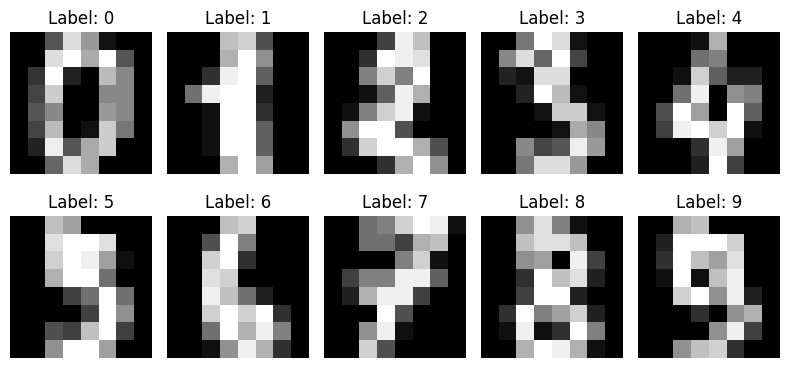

In [3]:
plt.figure(figsize=(8, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

Feature Scaling (IMPORTANT for KNN)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Scaling (IMPORTANT for KNN)

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy_k3 = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=3: {accuracy_k3:.4f}")

Accuracy with K=3: 0.9694


Try Multiple K Values

In [7]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

    print(f"K = {k}, Accuracy = {acc:.4f}")

K = 3, Accuracy = 0.9694
K = 5, Accuracy = 0.9750
K = 7, Accuracy = 0.9722
K = 9, Accuracy = 0.9722


Accuracy vs K Plot

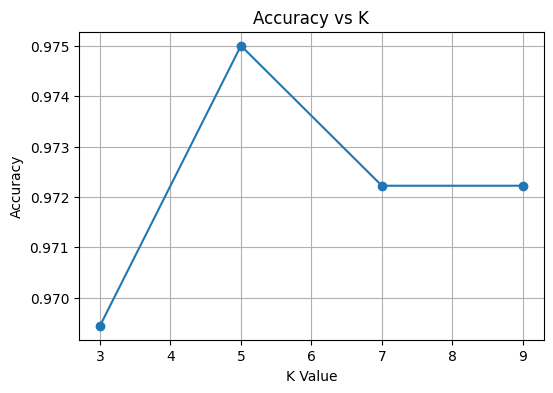

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.grid(True)
plt.savefig("screenshots/accuracy_vs_k.png", dpi=300, bbox_inches="tight")
plt.show()

Confusion Matrix

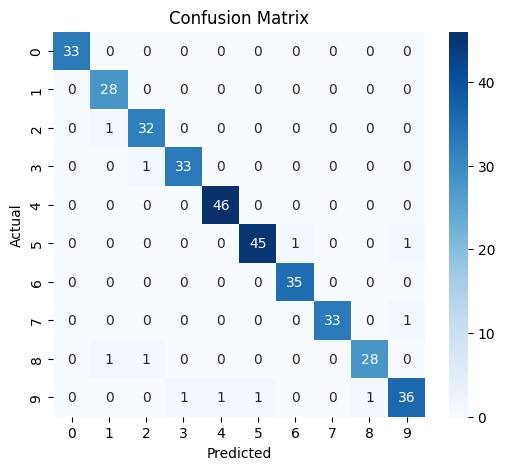

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("screenshots/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

Display 5 Test Images with Predictions

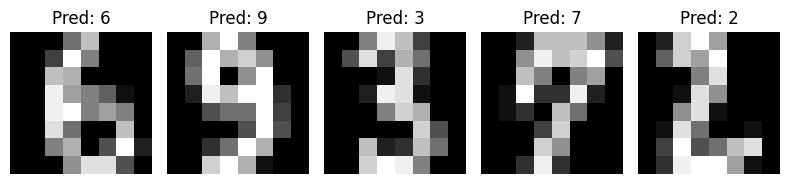

In [10]:
plt.figure(figsize=(8, 4))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Interpretation

- Feature scaling is essential for distance-based models like KNN.
- Accuracy varies with different K values.
- Lower K may lead to overfitting, higher K may underfit.
- Confusion matrix highlights misclassified digits.